# Домашнее задание "Продвинутая оптимизация".

### Задание

При фиксированном `seed=42` поэкспериментируйте с параметрами алгоритма [differential_evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html): strategy, popsize, mutation.

Постройте графики количества итераций (`nit`) оптимизации [функции ackley](https://en.wikipedia.org/wiki/Ackley_function) от значения параметра. 

Подробнее о результате выдачи [тут](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html).

In [39]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

%matplotlib inline

In [40]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

             message: Optimization terminated successfully.
             success: True
                 fun: 4.440892098500626e-16
                   x: [ 0.000e+00  0.000e+00]
                 nit: 92
                nfev: 2853
          population: [[ 0.000e+00  0.000e+00]
                       [ 0.000e+00  0.000e+00]
                       ...
                       [ 0.000e+00  0.000e+00]
                       [ 0.000e+00  0.000e+00]]
 population_energies: [ 4.441e-16  4.441e-16 ...  4.441e-16  4.441e-16]

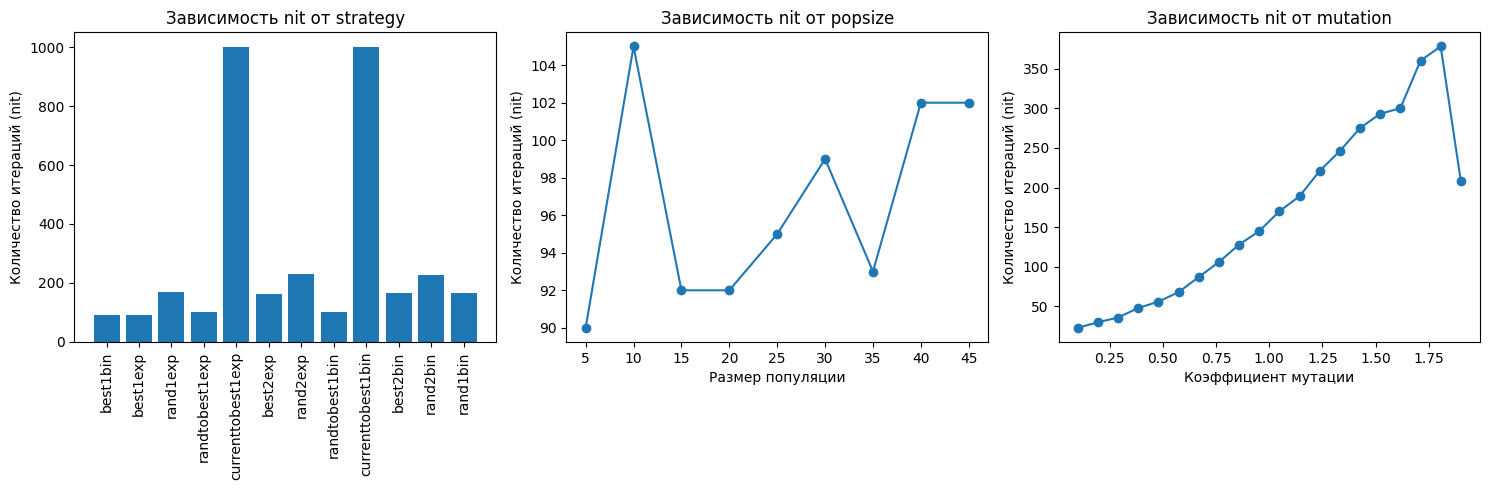

In [41]:
bounds = [(-10, 10), (-10, 10)]

strategies = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp',
              'currenttobest1exp', 'best2exp', 'rand2exp', 'randtobest1bin',
              'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']

strategy_lst = []
for strategy in strategies:
    result = differential_evolution(ackley, bounds, strategy=strategy, seed=42)
    strategy_lst.append(result.nit)

popsizes = range(5, 50, 5)
popsize_lst = []
for popsize in popsizes:
    result = differential_evolution(ackley, bounds, popsize=popsize, seed=42)
    popsize_lst.append(result.nit)

mutations = np.linspace(0.1, 1.9, 20)
mutation_lst = []
for mutation in mutations:
    result = differential_evolution(ackley, bounds, mutation=mutation, seed=42)
    mutation_lst.append(result.nit)


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(strategies, strategy_lst)
plt.xticks(rotation=90)
plt.title('Зависимость nit от strategy')
plt.ylabel('Кол-во итераций')

plt.subplot(1, 3, 2)
plt.plot(popsizes, popsize_lst, 'o-')
plt.title('Зависимость nit от popsize')
plt.xlabel('Размер популяции')
plt.ylabel('Кол-во итераций')

plt.subplot(1, 3, 3)
plt.plot(mutations, mutation_lst, 'o-')
plt.title('Зависимость nit от mutation')
plt.xlabel('Коэффициент мутации')
plt.ylabel('Кол-во итераций')

plt.tight_layout()
plt.show()

### Дополнительное задание


Поэкспериментируйте с параметрами и оптимизацией через [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html):

In [42]:
from scipy.optimize import minimize

x0 = [[0,0], [5,5], [-5,-5], [10,10], [-10,-10]]

# result_m = minimize(ackley, x0,  method='Nelder-Mead')
# result_m

In [43]:
### метод Нелдера-Мида
for point in x0:
    res_nelder = minimize(ackley, point, method='Nelder-Mead', options={'maxiter': 1000, 'xatol': 1e-8})
    print("Nelder-Mead:", res_nelder.x, "fval:", res_nelder.fun)

Nelder-Mead: [0. 0.] fval: 4.440892098500626e-16
Nelder-Mead: [4.98618046 4.98618046] fval: 12.632268991516
Nelder-Mead: [-4.98618046 -4.98618046] fval: 12.632268991516
Nelder-Mead: [9.99494702 9.99494702] fval: 17.291927102765936
Nelder-Mead: [-9.99494702 -9.99494702] fval: 17.291927102765936


In [44]:
### метод градиентов BFGS
for point in x0:
    res_bfgs = minimize(ackley, point, method='BFGS', options={'gtol': 1e-6})
    print("BFGS:", res_bfgs.x, "fval:", res_bfgs.fun)

BFGS: [0. 0.] fval: 4.440892098500626e-16
BFGS: [4.98618045 4.98618045] fval: 12.632268991516003
BFGS: [-4.98618046 -4.98618046] fval: 12.632268991516003
BFGS: [9.99494701 9.99494701] fval: 17.29192710276594
BFGS: [-9.99494703 -9.99494703] fval: 17.29192710276594


In [45]:
# метод сопряженных градиентов CG
for point in x0:
    result_cg = minimize(ackley, point, method='CG', options={'gtol': 1e-6})
    print("CG:", result_cg.x, "fval:", result_cg.fun)

CG: [0. 0.] fval: 4.440892098500626e-16
CG: [4.98618045 4.98618045] fval: 12.632268991516002
CG: [-4.98618046 -4.98618046] fval: 12.632268991516003
CG: [9.99494702 9.99494702] fval: 17.291927102765936
CG: [-9.99494704 -9.99494704] fval: 17.291927102765953


In [46]:
# метод доверительных областей trust-constr
for point in x0:
    result_tc = minimize(ackley, point, method='trust-constr', options={'xtol': 1e-8, 'gtol': 1e-8})
    print("trust-constr:", result_tc.x, "fval:", result_tc.fun)

trust-constr: [0. 0.] fval: 4.440892098500626e-16
trust-constr: [4.98618042 4.98618042] fval: 12.632268991516074
trust-constr: [-4.98618042 -4.98618042] fval: 12.632268991516074
trust-constr: [9.99494695 9.99494695] fval: 17.291927102766234
trust-constr: [-9.99494695 -9.99494695] fval: 17.291927102766234


Вы также можете поэкспериментировать с [другими методами оптимизации](https://habr.com/ru/company/prequel/blog/568496/), но это не обязательно для зачета.
